This notebook implements the raw solution of linear regression.

In [1]:
import sys

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
root_path = Path.cwd().parent.parent.parent.parent / "src"

In [3]:
sys.path.append(root_path.absolute().as_posix())
sns.set_style("whitegrid")

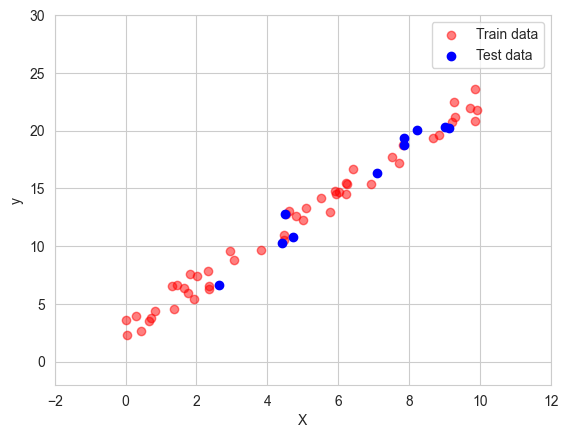

In [4]:
X_train = 10 * np.random.rand(50)
y_train = 2*X_train + 1 + (3*np.random.rand(X_train.shape[0]))

X_test = 10*np.random.rand(10)
y_test = 2*X_test + 1 + (3*np.random.rand(X_test.shape[0]))

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.scatter(X_test, y_test, color="blue", label="Test data")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

we have some data as red points and our goal is to predict the y-coordinate of the blue points?

In [5]:
from MachineLearning.losses import MeanSquaredError
from MachineLearning.optimizers import GradientDecent
from MachineLearning.commons import Model_LinearRegression_Loss_Mean_Squared_Error

epoch 0, loss: 20.053522203314177
epoch 1, loss: 3.9937265534635262
epoch 2, loss: 1.9725278265047672
epoch 3, loss: 1.7084515082616496
epoch 4, loss: 1.6644171177922578
epoch 5, loss: 1.6480509419266698
epoch 6, loss: 1.6352750741040645
epoch 7, loss: 1.6230745637260293
epoch 8, loss: 1.6110705965840777
epoch 9, loss: 1.599214299573453
epoch 10, loss: 1.5874981103104282
epoch 11, loss: 1.575919653606724
epoch 12, loss: 1.5644772202566943
epoch 13, loss: 1.553169200991099
epoch 14, loss: 1.541994015439184
epoch 15, loss: 1.5309501030454324
epoch 16, loss: 1.5200359217424728
epoch 17, loss: 1.509249947596953
epoch 18, loss: 1.4985906745793727
epoch 19, loss: 1.488056614351631
epoch 20, loss: 1.4776462960589347
epoch 21, loss: 1.4673582661243976
epoch 22, loss: 1.4571910880460657
epoch 23, loss: 1.4471433421963489
epoch 24, loss: 1.437213625623796
epoch 25, loss: 1.427400551857207
epoch 26, loss: 1.4177027507120348
epoch 27, loss: 1.4081188680990766
epoch 28, loss: 1.398647565835397
epoc

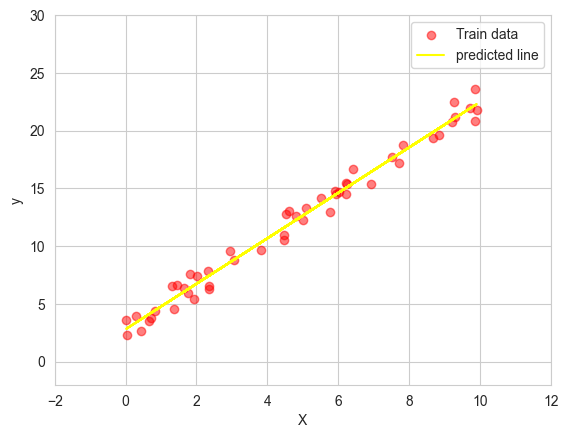

In [6]:
model = Model_LinearRegression_Loss_Mean_Squared_Error()
optimizer = GradientDecent(model=model.model, lr=0.01)

epochs = 10_000
for epoch in range(epochs):
    model.forward(X_train, y_train)
    
    print(f"epoch {epoch}, loss: {model.loss_function.output}")
    
    model.backprop()
    optimizer.update_params()

# Plot to how well it did.
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.plot(X_train, model.output, color="yellow", label="predicted line")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

In [7]:
# Evaluation on test data
mean_squared_error = MeanSquaredError()

model.forward(X_test, y_test)
predictions = model.output

mean_squared_error.calculate(y_test, predictions)
np.sqrt(mean_squared_error.output)

0.9820950529044419